In [1]:
import gym
env = gym.make('MountainCar-v0')

/home/user2020/anaconda3/envs/openaigym/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box(2,)
The action space: Discrete(3)


In [3]:
import matplotlib.pyplot as plt 

# reset the environment and see the initial observation
obs = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print("The new observation is {}".format(new_obs))

The initial observation is [-0.50235547  0.        ]
The new observation is [-5.02514684e-01 -1.59216983e-04]


In [4]:
env.render(mode = "human")

True

In [5]:
env.close()

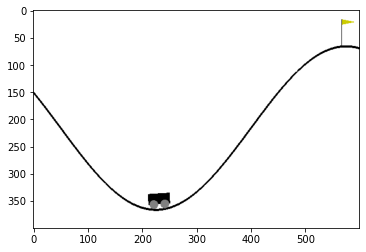

In [6]:
env_screen = env.render(mode = 'rgb_array')
env.close()

import matplotlib.pyplot as plt 
plt.imshow(env_screen)

In [7]:
import time 

# Number of steps you run the agent for 
num_steps = 1500

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

In [8]:
type(env.observation_space)

gym.spaces.box.Box

In [9]:
print("Upper Bound for Env Observation", env.observation_space.high)
print("Lower Bound for Env Observation", env.observation_space.low)

Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]


In [10]:
# Works 
env.step(2)
print("It works!")

# Doesn't work.
env.step(4)
print("It works!")

It works!


AssertionError: 4 (<class 'int'>) invalid

In [12]:
env = gym.make("BreakoutNoFrameskip-v4")

print("Observation Space: ", env.observation_space)
print("Action Space       ", env.action_space)


obs = env.reset()

for i in range(1000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    env.render()
    time.sleep(0.01)
env.close()

Observation Space:  Box(210, 160, 3)
Action Space        Discrete(4)


In [26]:
from collections import deque
from gym import spaces
import numpy as np

class ConcatObs(gym.Wrapper):
    def __init__(self, env, k):
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = \
            spaces.Box(low=0, high=255, shape=((k,) + shp), dtype=env.observation_space.dtype)


    def reset(self):
        ob = self.env.reset()
        for _ in range(self.k):
            self.frames.append(ob)
        return self._get_ob()

    def step(self, action):
        ob, reward, done, info = self.env.step(action)
        self.frames.append(ob)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        return np.array(self.frames)

In [27]:
env = gym.make("BreakoutNoFrameskip-v4")
wrapped_env = ConcatObs(env, 4)
print("The new observation space is", wrapped_env.observation_space)

The new observation space is Box(4, 210, 160, 3)


In [28]:
# Reset the Env
obs = wrapped_env.reset()
print("Intial obs is of the shape", obs.shape)

# Take one step
obs, _, _, _  = wrapped_env.step(2)
print("Obs after taking a step is", obs.shape)

Intial obs is of the shape (4, 210, 160, 3)
Obs after taking a step is (4, 210, 160, 3)


In [30]:
import random 

class ObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def observation(self, obs):
        # Normalise observation by 255
        return obs / 255.0

class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        # Clip reward between 0 to 1
        return np.clip(reward, 0, 1)
    
class ActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def action(self, action):
        if action == 3:
            return random.choice([0,1,2])
        else:
            return action

In [33]:
env = gym.make("BreakoutNoFrameskip-v4")
wrapped_env = ObservationWrapper(RewardWrapper(ActionWrapper(env)))

obs = wrapped_env.reset()

for step in range(500):
    action = wrapped_env.action_space.sample()
    obs, reward, done, info = wrapped_env.step(action)
    
    # Raise a flag if values have not been vectorised properly
    if (obs > 1.0).any() or (obs < 0.0).any():
        print("Max and min value of observations out of range")
    
    # Raise a flag if reward has not been clipped.
    if reward < 0.0 or reward > 1.0:
        assert False, "Reward out of bounds"
    
    # Check the rendering if the slider moves to the left.
    wrapped_env.render()
    
    time.sleep(0.001)

wrapped_env.close()

print("All checks passed")

All checks passed


In [34]:
print("Wrapped Env:", wrapped_env)
print("Unwrapped Env", wrapped_env.unwrapped)
print("Getting the meaning of actions", wrapped_env.unwrapped.get_action_meanings())

Wrapped Env: <ObservationWrapper<RewardWrapper<ActionWrapper<TimeLimit<AtariEnv<BreakoutNoFrameskip-v4>>>>>>
Unwrapped Env <AtariEnv<BreakoutNoFrameskip-v4>>
Getting the meaning of actions ['NOOP', 'FIRE', 'RIGHT', 'LEFT']
